This code will detect vacuoles within an image. 


input: micrgraph with many vacuoles
output: enhance contrast image
        coordinates of every vacuole and their relative radii
        

In [96]:
#Get a bunch of functions

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from skimage import data, img_as_float
from skimage import exposure
from skimage import filters
from scipy import ndimage as ndi
from math import sqrt
from skimage import feature
from skimage.feature import blob_dog
from skimage import draw

(1200, 1920)

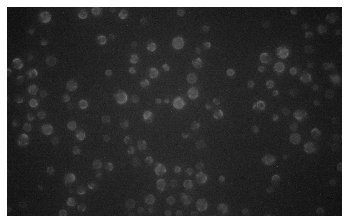

In [97]:
#Import image 
im1 = io.imread("IM1.ome.png")
im = img_as_float(im1) #adjust so all pixel values are scaled between 0 and 1

plt.imshow(im, cmap='gray')
plt.axis('off')
im.shape

(-0.5, 1919.5, 1199.5, -0.5)

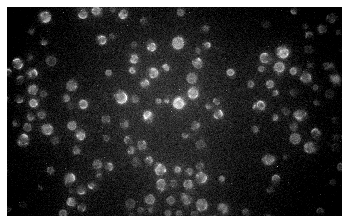

In [98]:
# Enhance contrast - stretching method 
# My understanding is that this is still a linear change in contrast
# I chose these values based on this image. Will need to see how it does on other ones. 

p_low, p_high = np.percentile(im, (18,99.99))
im_rescale = exposure.rescale_intensity(im, in_range=(p_low, p_high))

plt.imshow(im_rescale, cmap='gray')
plt.axis('off')

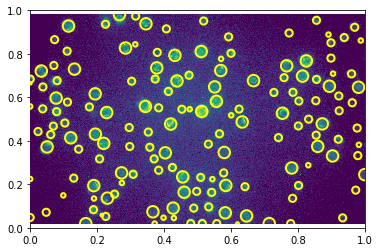

In [111]:
blobs_dog = blob_dog(im_rescale, min_sigma=1, max_sigma=30, threshold=.2)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(1.5) #if we want to include a slightly larger radius. 

fig, axes = plt.subplots(1, 1)

ax = fig.add_subplot(1, 1, 1)

for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)
    
plt.axis('off')
plt.imshow(im_rescale)
plt.show()

In [112]:
# read in original image, this is so that our mask turns out the same size
image = im_rescale

# create the mask image
mask = np.ones(shape=image.shape[0:2], dtype="bool")

for blob in blobs_dog:
    y, x, r = blob
    # taking the coordinates from the blob detection, draw circles on mask
    rr, cc = skimage.draw.circle(y, x, r, shape=image.shape[0:2])
    mask[rr, cc] = False

#plt.imshow(mask, cmap='gray')
#plt.axis('off')

(-0.5, 1919.5, 1199.5, -0.5)

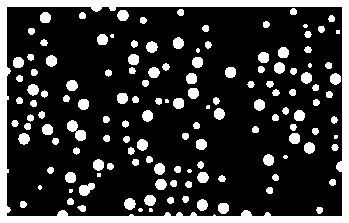

In [113]:
from skimage.util import invert
mask1 = invert(mask)
plt.imshow(mask1, cmap='gray')
plt.axis('off')

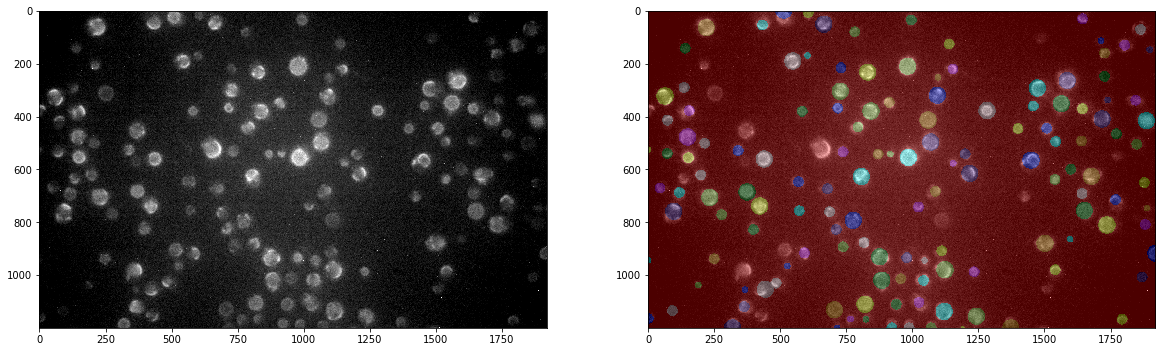

In [114]:
from scipy.ndimage import label
from skimage.color import label2rgb

labeled_vacuoles, _ = label(mask1) #if we dont invert, this could also be 1- mask insead
image_label_overlay = label2rgb(labeled_vacuoles, image=im_rescale)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(im_rescale, cmap='gray')
axes[1].imshow(image_label_overlay, cmap='gray')

In [115]:
from skimage import measure
from skimage.measure import regionprops
#from skimage.measure import regionprops_table #it cant import this

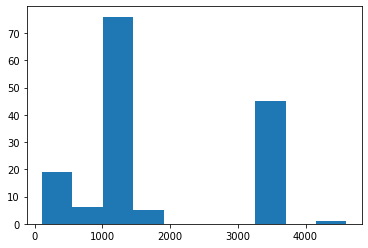

In [116]:
#what is the size distribution of vacuoles. We will want to cut out the super small ones I think

object_features = skimage.measure.regionprops(labeled_vacuoles)
object_areas = [objf["area"] for objf in object_features]
plt.hist(object_areas)
plt.show()

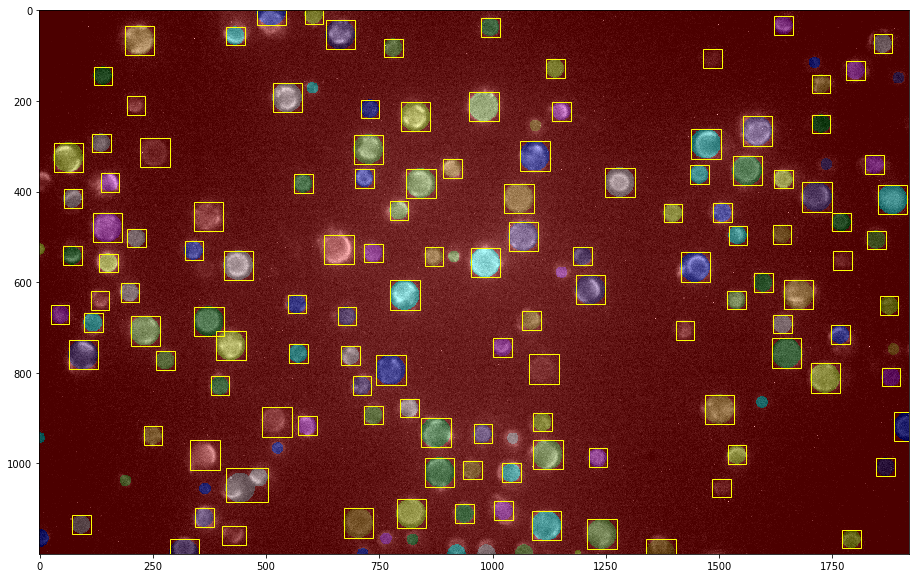

In [118]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))
ax.imshow(image_label_overlay)

for region in regionprops(labeled_vacuoles):

    # skip small vacuoles
    if region.area < 1000:
        continue

    # draw rectangle around larger vacuoles, check and see how that does
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='yellow', linewidth=1)
    ax.add_patch(rect)

plt.show()

In [94]:
for region in regionprops(labeled_vacuoles):

    # skip small vacuoles
    if region.area < 500:
        continue
        


NameError: name 'intensity_image' is not defined